In [1]:
# libraries used
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\kamci\python homework\Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="ISO-8859-1")

In [3]:
# removing nan values
groupingdata=data.dropna()


In [4]:
# rename the Area column to country 
data=data.rename(columns={'Area':'Country'})
data=data[data['Element']=='Temperature change']
# delete columns which contain the various codes
data=data.drop(columns=['Area Code','Months Code','Element Code','Unit'])
# keep only the 12 months and get rid of the three month
TempC=data.loc[data.Months.isin(['January', 'February', 'March', 'April',
                                 'May', 'June', 'July','August', 'September', 
                                 'October', 'November', 'December'])]

In [5]:
# data for Poland
PLN=TempC.loc[TempC.Country=='Poland']
PLN


,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
5914,Poland,January,Temperature change,-0.080,2.793,-7.424,-0.863,2.071,-1.167,-0.836,...,-3.263,2.730,2.665,0.715,2.104,4.730,0.772,-0.194,4.441,1.887
5916,Poland,February,Temperature change,4.476,-0.108,-5.718,-1.908,-3.276,2.606,2.344,...,0.474,-0.772,-3.490,1.750,4.999,3.191,5.657,2.665,-0.681,5.406
5918,Poland,March,Temperature change,3.827,-3.072,-3.232,-4.554,-1.592,0.914,3.562,...,1.461,1.626,3.210,-3.037,5.040,3.535,2.555,4.536,-1.090,4.305
5920,Poland,April,Temperature change,2.384,2.483,0.296,0.610,-1.227,1.052,-0.018,...,1.180,2.999,1.527,0.629,2.731,0.824,1.632,0.123,5.134,2.392
5922,Poland,May,Temperature change,-0.945,-1.998,1.860,0.179,-2.384,0.999,1.257,...,0.179,1.112,2.084,2.037,1.064,0.204,2.234,1.380,4.219,0.055
5924,Poland,June,Temperature change,1.253,-1.843,0.215,2.588,-0.133,0.248,-0.252,...,0.568,1.614,0.255,1.203,-0.290,0.153,2.021,1.458,2.223,4.944
5926,Poland,July,Temperature change,-1.131,-1.828,1.628,0.364,-1.393,0.149,1.123,...,3.373,0.394,2.055,1.451,2.948,1.730,1.737,0.682,2.695,1.136
5928,Poland,August,Temperature change,-0.588,-0.324,1.496,-0.940,-1.408,-0.419,0.295,...,1.817,1.377,1.413,1.642,0.512,4.132,1.032,2.082,3.561,2.880
5930,Poland,September,Temperature change,1.382,-0.739,1.355,0.112,1.086,-0.877,2.354,...,-0.867,1.819,1.110,-0.973,1.475,1.577,2.749,0.526,2.334,1.167
5932,Poland,October,Temperature change,2.164,0.036,-0.230,-0.420,-0.623,2.731,2.596,...,-1.995,0.362,0.183,1.813,2.397,-0.427,-0.762,1.564,2.262,2.568


In [6]:
# data for Estonia
EST=TempC.loc[TempC.Country=='Estonia']
EST

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
2446,Estonia,January,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.546,1.814,2.050,0.253,-0.347,4.843,-2.391,3.249,4.203,1.325
2448,Estonia,February,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.037,-3.223,-2.194,3.863,6.572,6.248,6.814,3.906,-0.638,6.487
2450,Estonia,March,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.169,1.821,3.504,-3.142,5.605,5.775,3.581,4.426,-0.452,4.208
2452,Estonia,April,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.199,2.634,1.691,0.150,2.894,2.388,2.405,0.265,3.045,3.522
2454,Estonia,May,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.669,1.143,1.905,4.114,2.111,0.651,3.559,0.231,4.899,1.202
2456,Estonia,June,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.144,2.517,-1.079,3.014,-0.783,-0.537,1.222,-0.857,0.731,3.095
2458,Estonia,July,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.408,4.009,1.665,1.391,3.234,-0.039,1.665,-0.526,3.784,0.184
2460,Estonia,August,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.874,1.410,0.217,1.527,1.915,1.521,0.800,0.907,2.810,1.052
2462,Estonia,September,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.724,2.234,1.667,1.068,1.667,2.247,1.923,1.357,3.161,0.928
2464,Estonia,October,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.883,1.853,0.591,1.385,0.279,-0.225,-1.047,0.012,1.504,0.932


In [7]:
# data for Ireland
IRL=TempC.loc[TempC.Country=='Ireland']
IRL

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
3636,Ireland,January,Temperature change,0.033,0.304,-4.423,1.064,-0.881,-0.178,0.717,...,-1.885,-0.386,2.589,1.175,1.466,0.764,1.736,1.832,1.282,1.669
3638,Ireland,February,Temperature change,2.883,0.816,-2.791,0.699,-1.080,1.706,0.935,...,-1.385,2.402,2.621,0.535,1.120,0.293,0.665,2.030,-0.385,3.229
3640,Ireland,March,Temperature change,2.437,-2.243,0.481,-0.247,-0.121,1.082,0.395,...,-0.108,0.771,2.848,-1.982,1.126,0.408,0.598,2.251,-1.169,1.440
3642,Ireland,April,Temperature change,1.325,-0.230,-0.033,0.304,0.217,-0.541,0.391,...,1.010,3.177,-0.544,-0.503,2.199,0.847,-0.462,1.192,0.901,1.510
3644,Ireland,May,Temperature change,0.105,-0.606,-0.779,1.362,0.361,-0.111,-1.436,...,0.305,0.964,0.610,-0.259,1.241,-0.181,1.566,2.050,1.864,0.779
3646,Ireland,June,Temperature change,-0.219,-0.850,0.494,-0.370,0.035,0.779,0.139,...,1.724,-0.725,-0.126,0.576,1.501,0.067,1.727,1.305,2.545,0.123
3648,Ireland,July,Temperature change,-0.786,-0.663,-0.650,-0.022,-1.210,-0.363,0.115,...,0.902,-0.158,-0.281,3.053,2.073,-0.244,0.946,0.700,2.099,1.727
3650,Ireland,August,Temperature change,-0.420,-1.005,-0.966,-0.177,-0.477,-0.512,-0.268,...,0.003,-0.498,1.251,1.364,0.019,-0.168,1.286,0.372,0.827,1.307
3652,Ireland,September,Temperature change,0.445,-1.065,-0.752,0.608,-1.409,0.851,-0.106,...,1.017,0.978,-0.130,1.113,1.789,-0.046,1.479,0.106,-0.241,0.858
3654,Ireland,October,Temperature change,-0.540,0.014,0.493,-0.999,0.613,-1.420,-0.899,...,0.129,1.364,-1.065,1.798,1.012,0.532,0.588,1.232,-0.330,-0.491


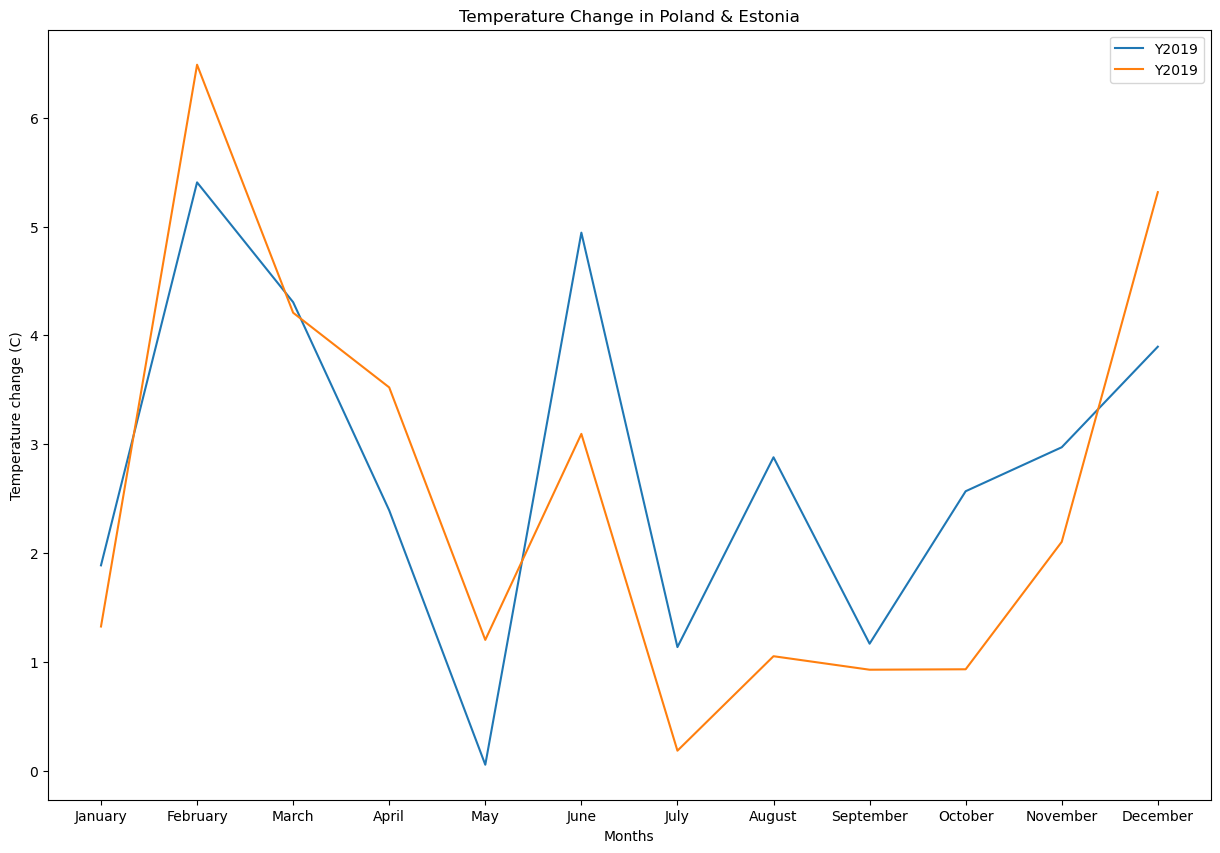

In [10]:
# plot to see how the temperature varies over the year for Poland VS Estonia

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2019.loc[PLN.Element=='Temperature change'], label='Y2019')
sns.lineplot(x=EST.Months.loc[EST.Element=='Temperature change'],y=EST.Y2019.loc[EST.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland & Estonia')
plt.show()


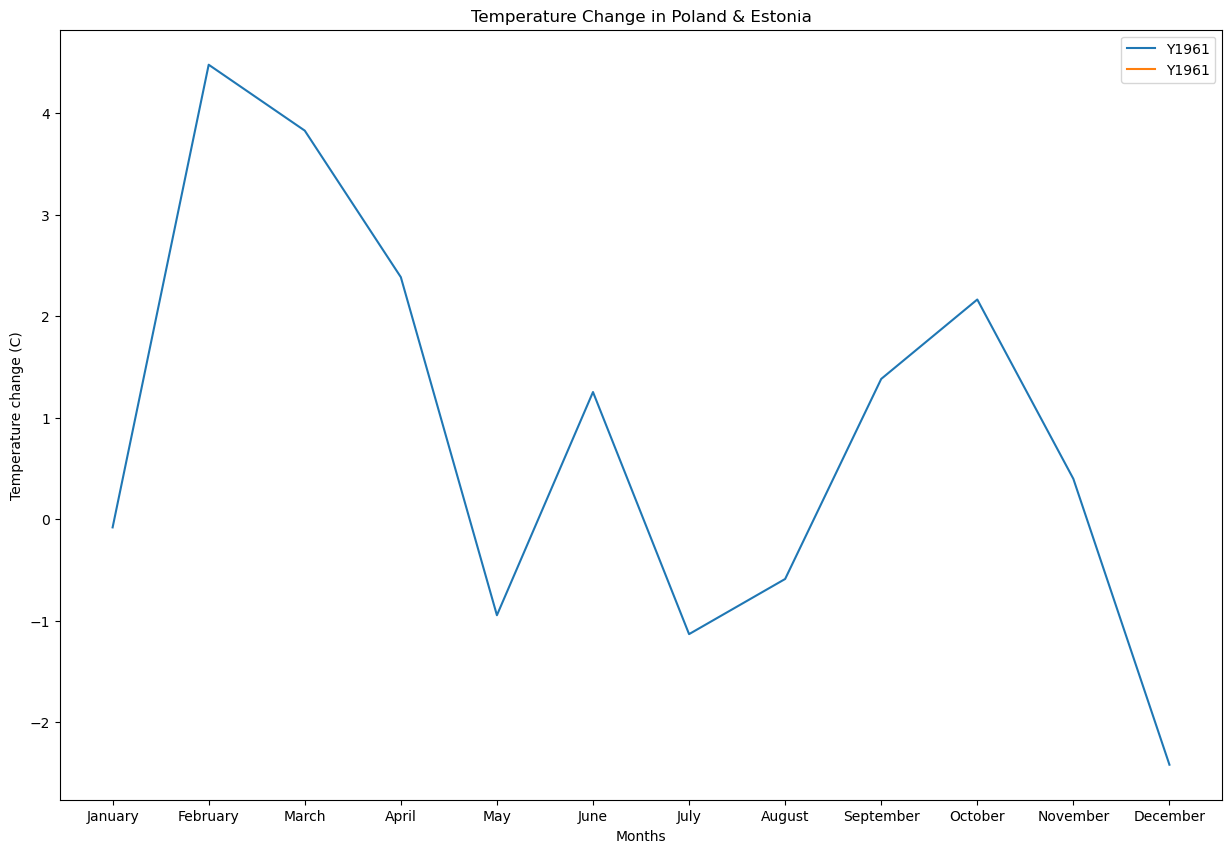

In [11]:
# plot to see how the temperature varies over the year for Poland VS Estonia

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=EST.Months.loc[EST.Element=='Temperature change'],y=EST.Y1961.loc[EST.Element=='Temperature change'], label='Y1961')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland & Estonia')
plt.show()

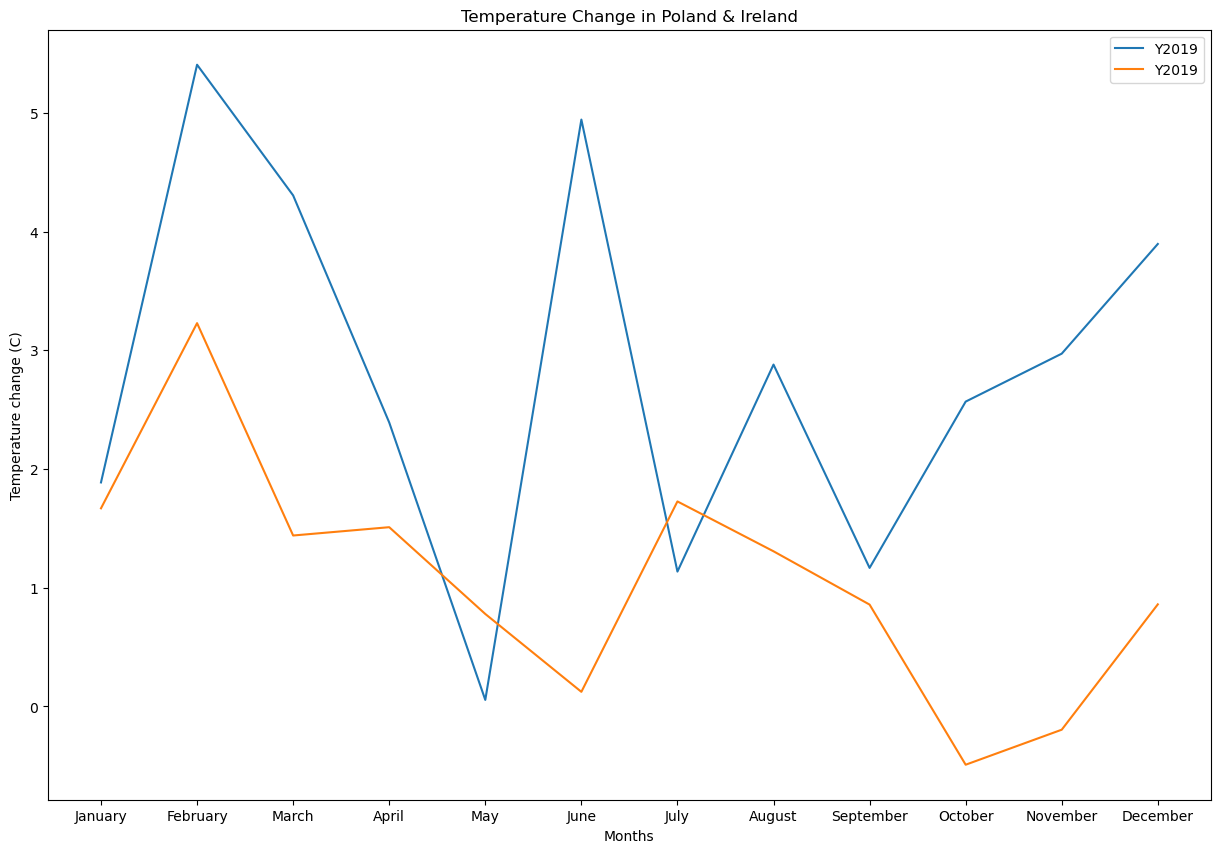

In [13]:
# plot to see how the temperature varies over the year for Poland VS Ireland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2019.loc[PLN.Element=='Temperature change'], label='Y2019')
sns.lineplot(x=IRL.Months.loc[IRL.Element=='Temperature change'],y=IRL.Y2019.loc[IRL.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland & Ireland')
plt.show()

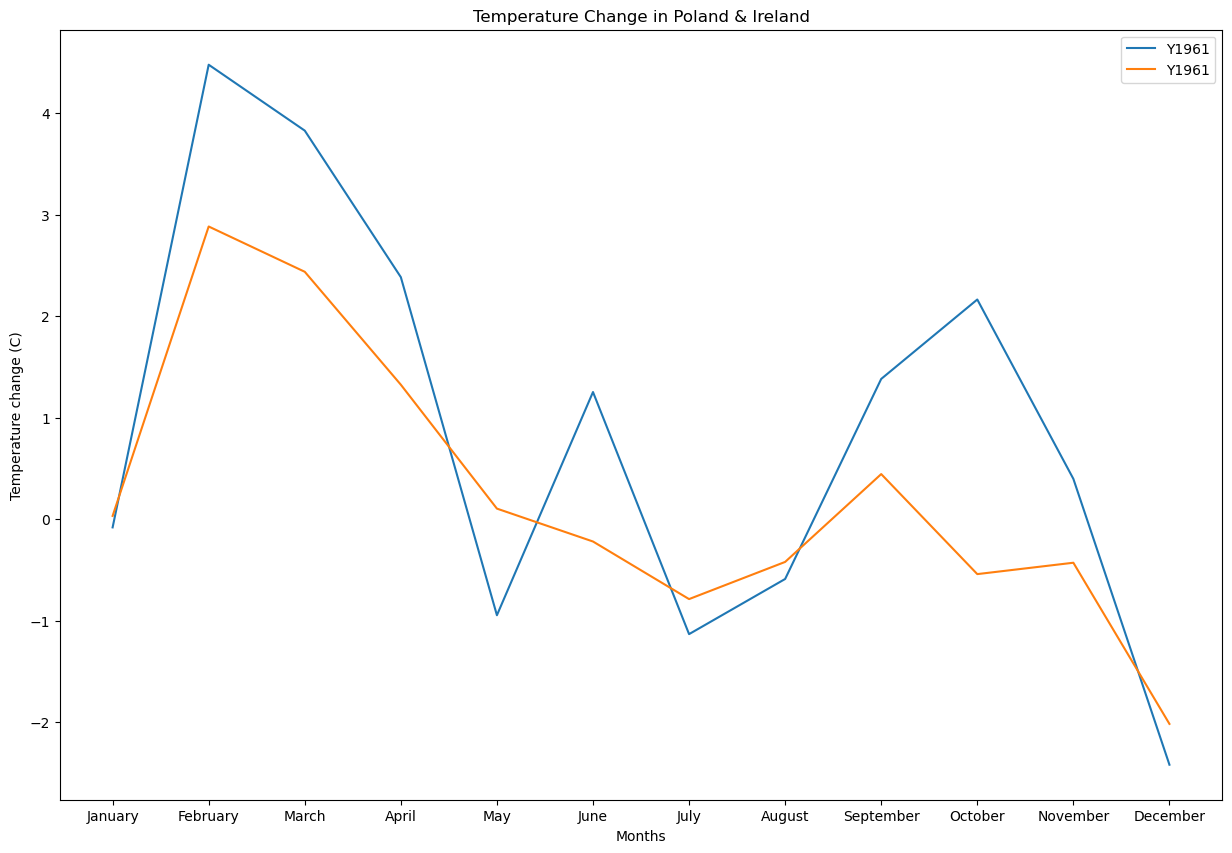

In [14]:
# plot to see how the temperature varies over the year for Poland VS Ireland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=IRL.Months.loc[IRL.Element=='Temperature change'],y=IRL.Y1961.loc[IRL.Element=='Temperature change'], label='Y1961')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland & Ireland')
plt.show()